In [2]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
from tqdm import tqdm
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import time

#ktis19 modules
from starter_code.visualize import visualize
from starter_code.utils import load_case

#own modules
    #architecture of network
from modules.NeuralNetwork import makeModel
    #simple matplotlib visualizer with slider
from modules.visualizeSlider import cube_show_slider
    #preprocessing for data 
    #REDUNDANT - USED ONLY IN DATA GENERATORS
from modules.preprocessing import preprocess_X, preprocess_y, scale
    #data flow generators
from modules.dataGenerators import trainGenerator, validationGenerator

#changing to half precision due to memory limitations
# import tf.keras.backend as K
# K.set_floatx('float16')
# K.set_epsilon(1e-4)

In [4]:
case_numbers = np.delete(np.arange(0, 209, 1), [158, 159, 170, 202])
case_numbers_val = case_numbers[179:]
case_numbers_train = case_numbers[:179]

iter  0


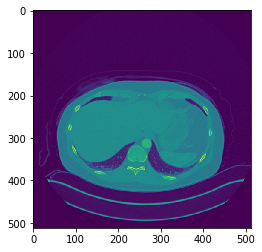

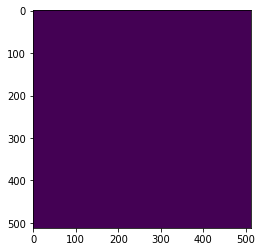

x.shape: (25, 512, 512, 1)
y.shape: (25, 512, 512, 2)
X data range: 0.0 to 0.5577534
y data range: 0.0 to 0.0
iter  1


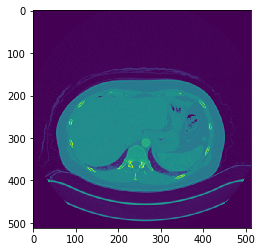

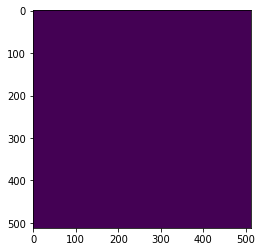

x.shape: (25, 512, 512, 1)
y.shape: (25, 512, 512, 2)
X data range: 0.0 to 0.5506716
y data range: 0.0 to 0.0
iter  2


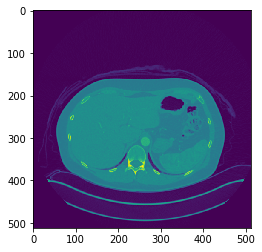

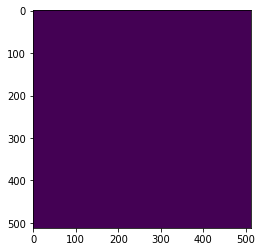

x.shape: (25, 512, 512, 1)
y.shape: (25, 512, 512, 2)
X data range: 0.0 to 0.5445666
y data range: 0.0 to 0.0
iter  3


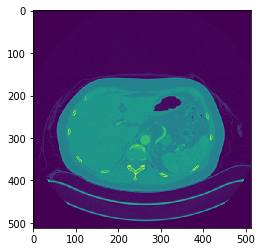

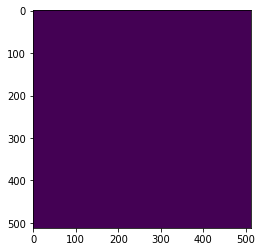

x.shape: (25, 512, 512, 1)
y.shape: (25, 512, 512, 2)
X data range: 0.0 to 0.5684982
y data range: 0.0 to 1.0
iter  4


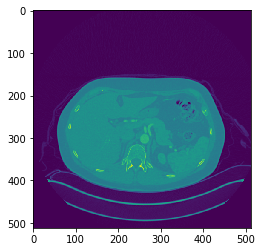

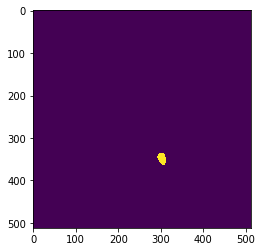

x.shape: (25, 512, 512, 1)
y.shape: (25, 512, 512, 2)
X data range: 0.0 to 0.557265
y data range: 0.0 to 1.0
iter  5


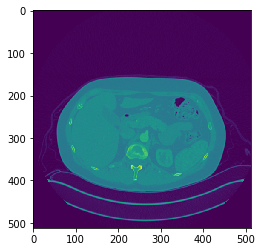

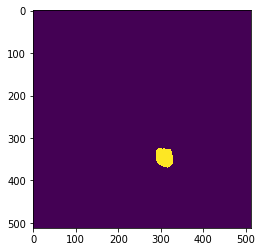

x.shape: (25, 512, 512, 1)
y.shape: (25, 512, 512, 2)
X data range: 0.0 to 0.5484738
y data range: 0.0 to 1.0


In [5]:
c = 0
for x, y in trainGenerator(case_numbers_train, 25):
  print('iter ', c)
  plt.imshow(x[0,:,:,0])
  plt.show()
  plt.imshow(y[0,:,:,0])
  plt.show()
  print('x.shape:', x.shape)
  print('y.shape:', y.shape)  
  print('X data range:', np.min(x), 'to', np.max(x))
  print('y data range:', np.min(y), 'to', np.max(y))
  c += 1
  if c > 5:
    break

In [11]:
NAME = 13
epoch = 7
val_loss = 0.002
print('saved_models/{}/model.{:02d}-{:.4f}.h5'.format(NAME, epoch, val_loss))

saved_models/13/model.07-0.0020.h5


(array([106.,  23.,  16.,   4.,   8.,   9.,   9.,   2.,   0.,   2.]),
 array([  29.,  132.,  235.,  338.,  441.,  544.,  647.,  750.,  853.,
         956., 1059.]),
 <a list of 10 Patch objects>)

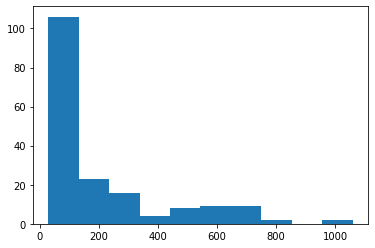

In [2]:
%matplotlib inline
heights = np.loadtxt('heights_train.txt')
plt.hist(heights)

In [22]:
start_time = time.time()
volume, segmentation = load_case(123)
print("loaded data %s s" % (time.time() - start_time))

X = volume.get_fdata()
y = segmentation.get_fdata()
loaded_time = time.time()
print("turned into arrays %s s" % (time.time() - start_time))
def find_segmentation(y)
    y_slices=len(y[:,0,0])-1
    for slice in range(y_slices):
        if np.sum(y[slice,:,:])>0:
            begining_slice=slice
            break
    for slice in range(y_slices):
        if np.sum(y[(y_slices-slice),:,:])>0:
            ending_slice=y_slices-slice
            break
    return begining_slice, ending_slice
print("scaned for segmentation %s s" % (time.time() - start_time))
print('total case slices: ', y_slices)
print('begining slice: ', begining_slice)
print('ending slice: ', ending_slice)
print('data reduced to: {:2f}% in {:4f} seconds'.format(((ending_slice-begining_slice)/y_slices)*100, time.time() - loaded_time))

loaded data 0.007001638412475586 s
turned into arrays 3.5539965629577637 s
scaned for segmentation 4.3369975090026855 s
total case slices:  388
begining slice:  95
ending slice:  179
data reduced to: 21.649485% in 0.784001 seconds


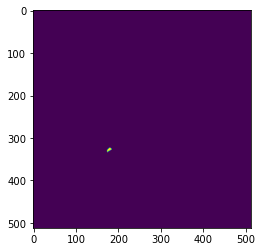

In [26]:
plt.imshow(y[90:96,:,:][-1])

In [4]:
# np.max(y)

In [5]:
# %matplotlib qt
# cube_show_slider(cube=y[:,:,:,1], axis=0, cmap='gray')

In [6]:
# def dice_score(y_true, y_pred):
#     numerator = 2 * tf.reduce_sum(y_true * y_pred, axis=(1,2,3))
#     denominator = tf.reduce_sum(y_true + y_pred, axis=(1,2,3))
#     return 1/(1 - numerator / denominator)

# def iou_loss_core(true,pred):  
#     intersection = true * pred
#     notTrue = 1 - true
#     union = true + (notTrue * pred)
#     return (K.sum(intersection, axis=-1) + K.epsilon()) / (K.sum(union, axis=-1) + K.epsilon())

In [18]:
X, y = next(trainGenerator(case_numbers_train, 200))

In [20]:
cube_show_slider(cube=X[:,:,:,0], axis=0, cmap='gray')

In [7]:
model = makeModel(512, 512, 1)

0-179 Train set, 180-209 val_set, 210-299 test

AMOUNT OF SLICES FOR TRAIN DATA == 38650

AMOUNT OF SLICES FOR VALID DATA == 4520

In [ ]:
NAME = "unet_without_edge_detection_with_batch_norm_{}".format(int(time.time()))
callbacks = [tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME))]


In [6]:
(case_numbers_val[0]-np.min(case_numbers_val))/(np.max(case_numbers_val)-np.min(case_numbers_val))

0.0

In [ ]:
batch_size = 8
data_size = 38650
val_data_size = 4520
results = model.fit(
    trainGenerator(case_numbers_train, batch_size),
    steps_per_epoch = int(np.floor( data_size / (batch_size) )),
    epochs = 4,
    callbacks = callbacks,
    verbose = 1,
    validation_data = validationGenerator(case_numbers_val, batch_size),
    validation_steps = int(np.floor( val_data_size / (batch_size) ))
    )

In [ ]:
model.save('saved_models\model_big_5')

In [3]:
model = tf.keras.models.load_model('saved_models\model_big_6', custom_objects={'soft_dice_loss': soft_dice_loss})

In [4]:
volume, segmentation = load_case(123)
X = preprocess_X(volume)
y = preprocess_y(segmentation)

In [5]:
predicted = model.predict(X)
def dice_score(y_pred, y_test):
    return np.sum(y_pred)*2.0 / (np.sum(y_pred) + np.sum(y_test))

dice_score(predicted[:,:,:,1], y[:,:,:,1])

1.7600154820218787

In [6]:
results.history

NameError: name 'results' is not defined

In [7]:
np.mean(predicted)

0.270936

In [12]:
cube_show_slider(cube=predicted[:,:,:,1], axis=0, cmap='gray')